# 01. Importing libraries 

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 02. Importing data

In [4]:
# Create path
path = r'/Users/chadstacey/04-01-2021_InstaCart_Basket_Analysis'

In [5]:
# Import latest version of ords/prods/cust dataset
ords_prods_cust = pd.read_pickle(os.path.join(path, '02_Data', 'Prepared_Data', 'orders_products_customers_merged.pkl'))

In [6]:
ords_prods_cust.shape

(32404859, 32)

# 03. Bar chart 

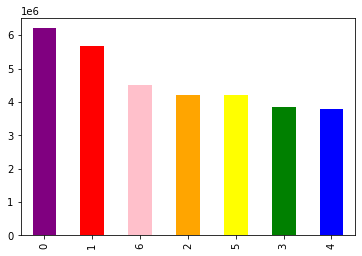

In [5]:
# Plot bar chart showing frequency of orders on each day of week
bar1 = ords_prods_cust['orders_day_of_week'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

In [6]:
# Export bar 
bar1.figure.savefig(os.path.join(path, '04_Analysis','Visualisations', 'bar1_orders_dow.png'))

# 04. Histogram/scatterplot

<AxesSubplot:ylabel='Frequency'>

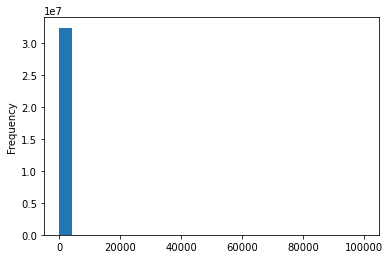

In [7]:
# Plot histogram for prices 
ords_prods_cust['prices'].plot.hist(bins = 25)

<AxesSubplot:xlabel='prices', ylabel='prices'>

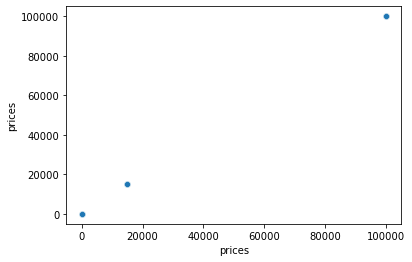

In [8]:
# Plot scatterplot 
sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_cust)

In [9]:
# Check for outliers
ords_prods_cust.loc[ords_prods_cust['prices'] > 100]

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,order_frequency_flag,First Name,Surname,Gender,STATE,Age,date_joined,dependants,fam_status,income
7805,1435153,1519,26,2,11,6.0,21553,15,0,Lowfat 2% Milkfat Cottage Cheese,...,Frequent customer,Craig,Clark,Male,Rhode Island,68,3/4/2020,0,divorced/widowed,177864
7806,1066435,1519,32,3,10,5.0,21553,28,1,Lowfat 2% Milkfat Cottage Cheese,...,Frequent customer,Craig,Clark,Male,Rhode Island,68,3/4/2020,0,divorced/widowed,177864
15143,1697208,2409,33,1,19,5.0,21553,1,0,Lowfat 2% Milkfat Cottage Cheese,...,Frequent customer,Nicole,Odonnell,Female,Hawaii,55,11/11/2018,2,married,230074
20264,965345,3531,27,2,19,8.0,33664,2,0,2 % Reduced Fat Milk,...,Frequent customer,Alice,Compton,Female,Hawaii,80,10/6/2019,2,married,233776
20497,2943740,3793,1,2,9,NaN,21553,3,0,Lowfat 2% Milkfat Cottage Cheese,...,Regular customer,Jerry,Allen,Male,Louisiana,59,8/23/2019,3,married,182933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32303799,3265389,51346,4,1,17,13.0,33664,2,1,2 % Reduced Fat Milk,...,Regular customer,nan,Gould,Male,Rhode Island,58,1/25/2019,1,married,207497
32307882,1179092,131671,12,4,9,15.0,33664,1,0,2 % Reduced Fat Milk,...,Regular customer,Diana,Hansen,Female,Rhode Island,35,8/4/2018,0,single,86490
32310810,1226705,39667,7,2,15,20.0,33664,14,0,2 % Reduced Fat Milk,...,Non-frequent customer,Johnny,Colon,Male,Rhode Island,78,5/8/2019,2,married,195077
32330048,3000037,95105,2,4,19,22.0,33664,4,0,2 % Reduced Fat Milk,...,Frequent customer,Catherine,Browning,Female,South Carolina,48,1/18/2017,2,married,398880


In [10]:
# Assign missing values 
ords_prods_cust.loc[ords_prods_cust['prices'] >100, 'prices'] = np.nan

In [11]:
# Check output 
ords_prods_cust['prices'].max()

25.0

<AxesSubplot:ylabel='Frequency'>

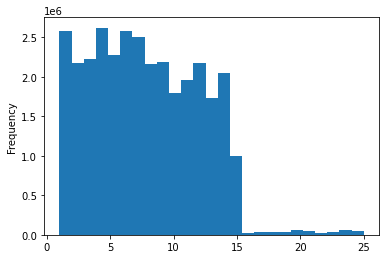

In [12]:
# Re-try plotting histogram
ords_prods_cust['prices'].plot.hist(bins = 25)

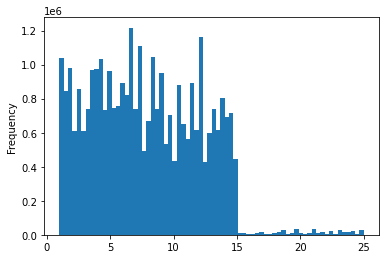

In [13]:
# Increase granularity 
hist1 = ords_prods_cust['prices'].plot.hist(bins = 70)

In [14]:
# Export histogram
hist1.figure.savefig(os.path.join(path, '04_Analysis','Visualisations', 'hist1_orders_dow.png'))

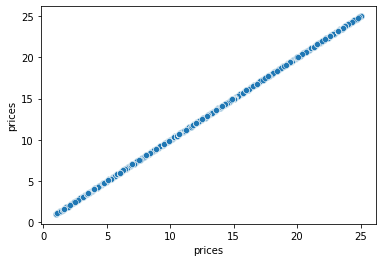

In [15]:
# Plot scatterplot 
scatter1 = sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_cust)

In [16]:
# Export scatterplot
scatter1.figure.savefig(os.path.join(path, '04_Analysis','Visualisations', 'scatter1_orders_dow.png'))

# 05. Line graph

First, sample data:

In [7]:
# Create a list holding true/false values to the test np.random.rand() <= 0.7
np.random.seed(4)
dev = np.random.rand(len(ords_prods_cust)) <= 0.7

In [8]:
# Check output
dev

array([False,  True, False, ...,  True,  True,  True])

In [9]:
# Store 70% of the sample in the dataframe big 
big = ords_prods_cust[dev]

In [10]:
# Store 30% of the sample in the dataframe small 
small = ords_prods_cust[~dev]

In [11]:
# Check how many rows
len(ords_prods_cust)

32404859

In [12]:
# Check how many rows 
len(big) + len(small)

32404859

Then, create line graph:

In [13]:
# Specify which columns
df_2 = small[['orders_day_of_week','prices']]

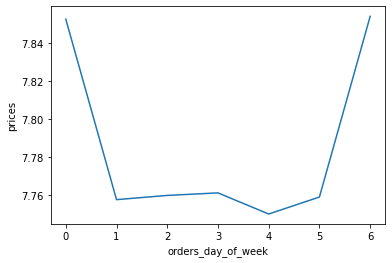

In [14]:
# Create line chart 
line1 = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')

I still can't work out why the above line graph is different from the one in the exercise!!!

In [15]:
line1.figure.savefig(os.path.join(path, '04_Analysis','Visualisations', 'line_dow_prices.png'))

# Question 3) You need to provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column.

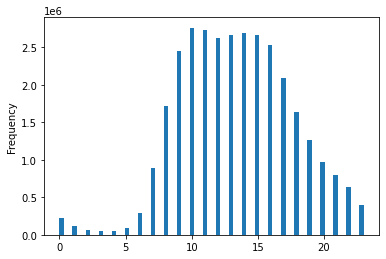

In [25]:
hist2 = ords_prods_cust['order_hour_of_day'].plot.hist(bins = 70)

This histogram demonstrates that most orders are placed at 10am, and generally the highest concentraion of orders are placed between 10am and 4pm. Unsurprisingly, very little orders in comparison are placed between midnight and 6am. 

In [26]:
# Export histogram 
hist2.figure.savefig(os.path.join(path, '04_Analysis','Visualisations', 'hist2_orders_hod.png'))

# Question 4) The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.

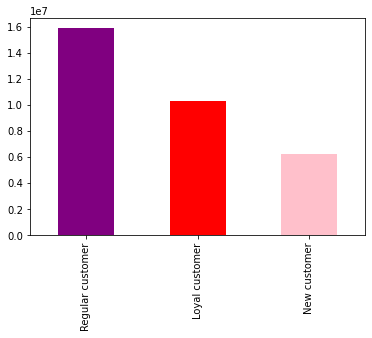

In [27]:
# Plot bar chart showing distribution of orders among customers in terms of loyalty
bar2 = ords_prods_cust['loyalty_flag'].value_counts().plot.bar(color =['purple', 'red', 'pink'])

In [28]:
# Export bar 
bar2.figure.savefig(os.path.join(path, '04_Analysis','Visualisations', 'bar2_loyalty_flag.png'))

# Question 5) Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!)

In [16]:
# Specify which columns
df_3 = small[['order_hour_of_day','prices']]

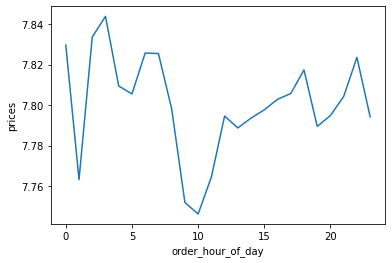

In [17]:
# Create line chart 
line2 = sns.lineplot(data = df_3, x = 'order_hour_of_day',y = 'prices')

In [18]:
line2.figure.savefig(os.path.join(path, '04_Analysis','Visualisations', 'line2_hod_prices.png'))

Again there is an issue here and I can't seem to work out what it is... 

# Question 6) Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. First, determine whether there’s a connection between age and family status by creating a line chart exploring the connections between age and number of dependents

In [31]:
# Specify which columns
df_4 = small[['Age','dependants']]

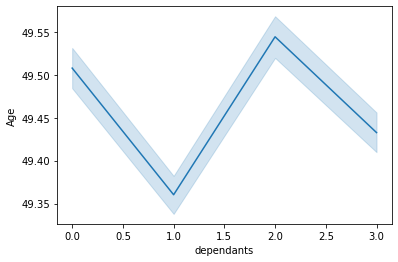

In [32]:
# Create line chart 
line3 = sns.lineplot(data = df_4, x = 'dependants',y = 'Age')

Again this output must be wrong. There is a serious issue with my line graphs!

# Question 7) You’ll also need to explore whether there’s a connection between age and spending power. To visualize this relationship, create a scatterplot using the sns.scatterplot() function.

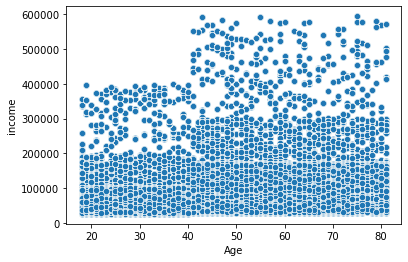

In [33]:
# Plot scatterplot 
scatter2 = sns.scatterplot(x = 'Age', y = 'income',data = ords_prods_cust)

This scatterplot demonstrates there is a very small correlation between age and spending power. People with really high incomes tend to be a bit older but it't not a very strong positive correlation. 

In [34]:
# Export scatterplot
scatter2.figure.savefig(os.path.join(path, '04_Analysis','Visualisations', 'scatter2_age_income.png'))

In [35]:
# Export ords_prods_cust 
ords_prods_cust.to_pickle(os.path.join(path, '02_Data','Prepared_Data', 'orders_products_customers_merged.pkl'))